In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sagemaker
import boto3
from sagemaker.session import s3_input, Session

In [3]:
bucket_name = 'supraja-var-btcdataset' 
my_region = boto3.session.Session().region_name # set the region of the instance
print(my_region)

us-east-1


In [4]:
s3 = boto3.resource('s3')
try:
    if  my_region == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)

S3 bucket created successfully


In [5]:
# set an output path where the trained model will be saved
prefix = 'var-btc-as-a-built-in-algo'
output_path ='s3://{}/{}/output'.format(bucket_name, prefix)
print(output_path)

s3://supraja-var-btcdataset/var-btc-as-a-built-in-algo/output


In [6]:
symbols = ["BTC-USD","^GSPC","^DJI","^IXIC","^RUT","CL=F","^FTSE","GC=F","SI=F","^N225","JPY=X","GBPUSD=X","EURUSD=X"]
start_date = "2007-01-02"

features_close = {}

for symbol in symbols:
    features = yf.download(symbol, start=start_date)
    features_close[symbol] = features["Close"]

# Combine Close prices into single dataframe
df= pd.concat(features_close.values(), axis=1, keys=features_close.keys())

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BTC-USD,^GSPC,^DJI,^IXIC,^RUT,CL=F,^FTSE,GC=F,SI=F,^N225,JPY=X,GBPUSD=X,EURUSD=X
Date,,,,,,,,,,,,,
2007-01-02,NaN,NaN,NaN,NaN,NaN,61.049999,6310.899902,635.200012,12.818000,NaN,118.830002,1.973399,1.327598
2007-01-03,NaN,1416.599976,12474.519531,2423.159912,787.419983,58.320000,6319.000000,627.099976,12.555000,NaN,119.339996,1.952210,1.317107
2007-01-04,NaN,1418.339966,12480.690430,2453.429932,789.950012,55.590000,6287.000000,623.900024,12.727000,17353.669922,118.830002,1.942993,1.309295
2007-01-05,NaN,1409.709961,12398.009766,2434.250000,775.869995,56.310001,6220.100098,604.900024,12.130000,17091.589844,118.690002,1.930800,1.298499
2007-01-08,NaN,1412.839966,12423.490234,2438.199951,776.989990,56.090000,6194.200195,607.500000,12.260000,NaN,118.690002,1.940316,1.304002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-30,29275.308594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-31,29230.111328,4588.959961,35559.531250,14346.019531,2003.180054,81.800003,7699.399902,1970.500000,24.854000,33172.218750,140.757996,1.285397,1.102426
2023-08-01,29675.732422,4576.729980,35630.679688,14283.910156,1994.170044,81.370003,7666.299805,1940.699951,24.208000,33476.578125,142.322998,1.283401,1.099759


In [7]:
new_names = {"BTC-USD" : "Bitcoin.close" , "^GSPC" : "gscp.close", "^DJI" : "dji.close","^IXIC": "ixic.close","^RUT":"rut.close",
             "CL=F" : "clf.close", "^FTSE" : "ftse.close","GC=F" : "gfc.close","SI=F" : "sif.close","^N225" : "n225.close",
             "JPY=X" : "jpy.close","GBPUSD=X" : "gbpusd.close", "EURUSD=X" : "eurusd.close"}
df = df.rename(columns=new_names)

# Print the first few rows of the renamed dataframe
print(df.tail())

            Bitcoin.close   gscp.close     dji.close    ixic.close  \
Date                                                                 
2023-07-30   29275.308594          NaN           NaN           NaN   
2023-07-31   29230.111328  4588.959961  35559.531250  14346.019531   
2023-08-01   29675.732422  4576.729980  35630.679688  14283.910156   
2023-08-02            NaN  4513.390137  35282.519531  13973.450195   
2023-08-03   29104.332031          NaN           NaN           NaN   

              rut.close  clf.close   ftse.close    gfc.close  sif.close  \
Date                                                                      
2023-07-30          NaN        NaN          NaN          NaN        NaN   
2023-07-31  2003.180054  81.800003  7699.399902  1970.500000  24.854000   
2023-08-01  1994.170044  81.370003  7666.299805  1940.699951  24.208000   
2023-08-02  1966.829956  79.489998  7561.600098  1937.400024  23.754000   
2023-08-03          NaN  79.620003          NaN  1970.00000

In [8]:
df = df.dropna(axis=0)
df.isna().sum()

Bitcoin.close    0
gscp.close       0
dji.close        0
ixic.close       0
rut.close        0
clf.close        0
ftse.close       0
gfc.close        0
sif.close        0
n225.close       0
jpy.close        0
gbpusd.close     0
eurusd.close     0
dtype: int64

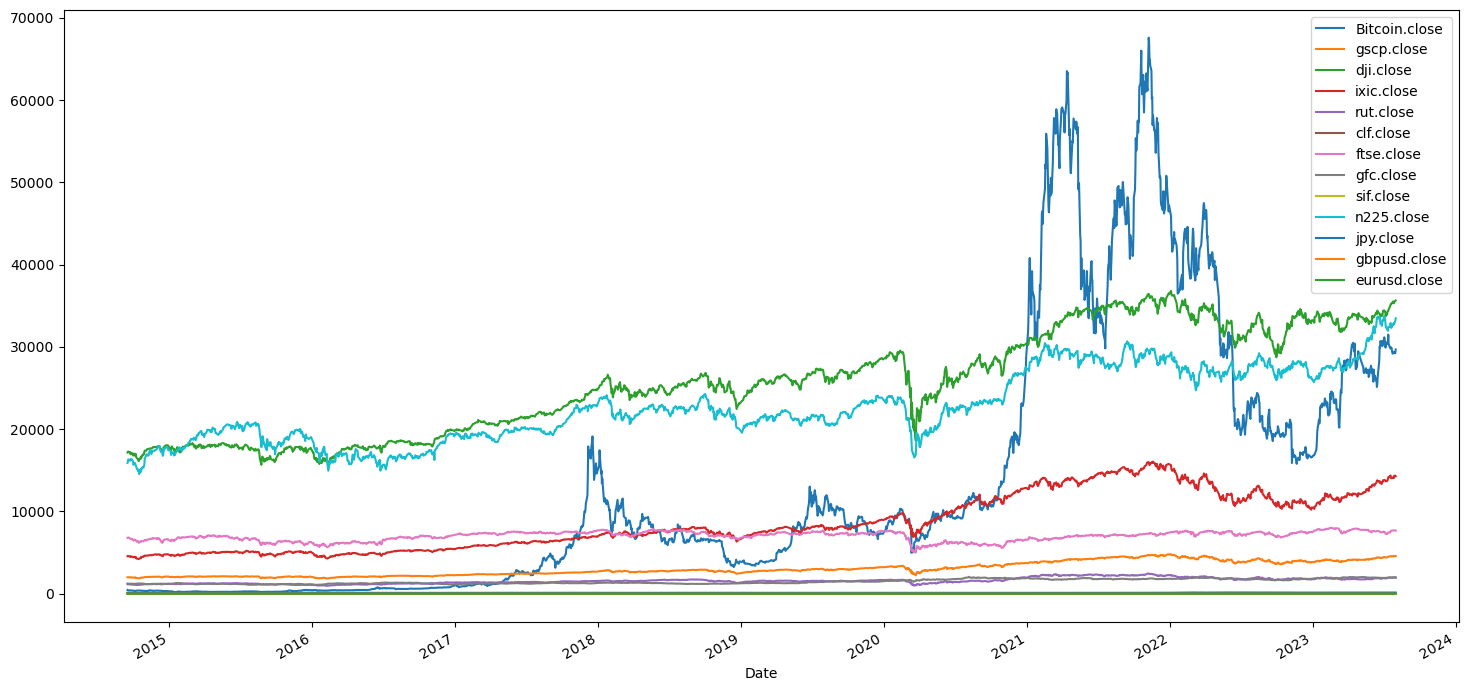

In [9]:
df_plot = pd.DataFrame(df, index=df.index)
# Plot the DataFrame
df_plot.plot(figsize=(18,9))
plt.show()

In [10]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# VECTOR AUTO REGRESSION

In [11]:
macro_data = df
print(macro_data.shape) 
macro_data.head()

(2052, 13)


,Bitcoin.close,gscp.close,dji.close,ixic.close,rut.close,clf.close,ftse.close,gfc.close,sif.close,n225.close,jpy.close,gbpusd.close,eurusd.close
Date,,,,,,,,,,,,,
2014-09-17,457.334015,2001.569946,17156.849609,4562.189941,1153.890015,94.419998,6780.899902,1234.400024,18.663000,15888.669922,107.150002,1.626598,1.295908
2014-09-18,424.440002,2011.359985,17265.990234,4593.430176,1159.270020,93.070000,6819.299805,1225.699951,18.452000,16067.570312,108.515999,1.626810,1.285000
2014-09-19,394.795990,2010.400024,17279.740234,4579.790039,1146.920044,92.410004,6837.899902,1215.300049,17.781000,16321.169922,108.800003,1.643709,1.292006
2014-09-22,402.152008,1994.290039,17172.679688,4527.689941,1129.359985,91.519997,6773.600098,1216.800049,17.698999,16205.900391,108.940002,1.631987,1.284142
2014-09-24,423.204987,1998.300049,17210.060547,4555.220215,1128.310059,92.800003,6706.299805,1218.599976,17.643000,16167.450195,108.542000,1.639371,1.285397


In [12]:
ad_fuller_result_1 = adfuller(macro_data['Bitcoin.close'].diff()[1:])

print('realBitcoin')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
################################################################################
ad_fuller_result_2 = adfuller(macro_data['gscp.close'].diff()[1:])
print('realgscp')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

################################################################################
ad_fuller_result_3 = adfuller(macro_data['dji.close'].diff()[1:])
print('realdji')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')
################################################################################

ad_fuller_result_4 = adfuller(macro_data['ixic.close'].diff()[1:])
print('realixic')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_5 = adfuller(macro_data['rut.close'].diff()[1:])

print('realrut')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')
################################################################################
ad_fuller_result_6 = adfuller(macro_data['clf.close'].diff()[1:])
print('realclf')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_7 = adfuller(macro_data['ftse.close'].diff()[1:])

print('realftse')
print(f'ADF Statistic: {ad_fuller_result_7[0]}')
print(f'p-value: {ad_fuller_result_7[1]}')
################################################################################
ad_fuller_result_8 = adfuller(macro_data['gfc.close'].diff()[1:])
print('realgfc')
print(f'ADF Statistic: {ad_fuller_result_8[0]}')
print(f'p-value: {ad_fuller_result_8[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_9 = adfuller(macro_data['sif.close'].diff()[1:])

print('realsif')
print(f'ADF Statistic: {ad_fuller_result_9[0]}')
print(f'p-value: {ad_fuller_result_9[1]}')
################################################################################
ad_fuller_result_10 = adfuller(macro_data['n225.close'].diff()[1:])
print('realn225')
print(f'ADF Statistic: {ad_fuller_result_10[0]}')
print(f'p-value: {ad_fuller_result_10[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_11 = adfuller(macro_data['jpy.close'].diff()[1:])

print('realjpy')
print(f'ADF Statistic: {ad_fuller_result_11[0]}')
print(f'p-value: {ad_fuller_result_11[1]}')
################################################################################
ad_fuller_result_12 = adfuller(macro_data['gbpusd.close'].diff()[1:])
print('realgbpusd')
print(f'ADF Statistic: {ad_fuller_result_12[0]}')
print(f'p-value: {ad_fuller_result_12[1]}')

print('\n---------------------\n')
################################################################################ 	eurusd.close
ad_fuller_result_13 = adfuller(macro_data['eurusd.close'].diff()[1:])
print('realeurusd')
print(f'ADF Statistic: {ad_fuller_result_13[0]}')
print(f'p-value: {ad_fuller_result_13[1]}')


realBitcoin
ADF Statistic: -7.097906707434277
p-value: 4.241912904948246e-10
realgscp
ADF Statistic: -9.659006697648389
p-value: 1.3694535809342454e-16

---------------------

realdji
ADF Statistic: -13.536985841647368
p-value: 2.55634258761362e-25
realixic
ADF Statistic: -9.553820142691704
p-value: 2.5300661022516157e-16

---------------------

realrut
ADF Statistic: -13.263541993375485
p-value: 8.30556121377834e-25
realclf
ADF Statistic: -30.41406829345895
p-value: 0.0

---------------------

realftse
ADF Statistic: -45.17033176906452
p-value: 0.0
realgfc
ADF Statistic: -12.246882776902769
p-value: 9.737911285577087e-23

---------------------

realsif
ADF Statistic: -12.52352064038702
p-value: 2.517845115805472e-23
realn225
ADF Statistic: -26.101864255068705
p-value: 0.0

---------------------

realjpy
ADF Statistic: -46.29201941115422
p-value: 0.0
realgbpusd
ADF Statistic: -43.81834334194681
p-value: 0.0

---------------------

realeurusd
ADF Statistic: -46.38585793592502
p-value: 0

In [13]:
df.columns

Index(['Bitcoin.close', 'gscp.close', 'dji.close', 'ixic.close', 'rut.close',
       'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close',
       'jpy.close', 'gbpusd.close', 'eurusd.close'],
      dtype='object')

In [14]:
macro_data = macro_data[['Bitcoin.close','gscp.close','dji.close', 'ixic.close', 'rut.close',
       'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close',
       'jpy.close', 'gbpusd.close', 'eurusd.close']]
print(macro_data.shape)

(2052, 13)


In [15]:
train_df=macro_data[:-30]
test_df=macro_data[-30:]

In [16]:
print(test_df.shape)

(30, 13)


In [17]:
import os
train_csv = train_df.to_csv('btc-var-train.csv')
test_csv = test_df.to_csv('btc-var-test.csv')

In [30]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/btc-var-train.csv')).upload_file('btc-var-train.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [31]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'test/btc-var-test.csv')).upload_file('btc-var-test.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [20]:
model = VAR(train_df.diff()[1:])

In [21]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        44.19       44.23   1.554e+19       44.20
1        43.48      43.99*   7.621e+18      43.66*
2       43.44*       44.42  7.317e+18*       43.80
3        43.48       44.93   7.617e+18       44.01
4        43.53       45.45   7.999e+18       44.23
5        43.57       45.97   8.369e+18       44.45
6        43.62       46.50   8.804e+18       44.68
7        43.67       47.02   9.251e+18       44.90
8        43.69       47.51   9.446e+18       45.09
9        43.72       48.01   9.733e+18       45.30
10       43.78       48.55   1.035e+19       45.53
11       43.84       49.08   1.097e+19       45.76
12       43.89       49.60   1.158e+19       45.99
13       43.94       50.12   1.212e+19       46.21
14       43.94       50.60   1.220e+19       46.39
15       43.98       51.12   1.274e+19       46.60
16       44.02       51.62   1.

In [22]:
var_model = VARMAX(train_df, order=(1,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                                                                              Statespace Model Results                                                                                                             
Dep. Variable:     ['Bitcoin.close', 'gscp.close', 'dji.close', 'ixic.close', 'rut.close', 'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close', 'jpy.close', 'gbpusd.close', 'eurusd.close']   No. Observations:                 2022
Model:                                                                                                                                                                                              VAR(1)   Log Likelihood              -81682.209
                                                                                                                                                                                               + intercept   AIC                         163910.419
Date:                   

In [23]:
n_forecast = 30
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [24]:
predictions.columns=['btc_predicted','gscp_predicted','dji_predicted', 'ixic_predicted', 'rut_predicted',
       'clf_predicted', 'ftse_predicted', 'gfc_predicted', 'sif_predicted', 'n225_predicted',
       'jpy_predicted', 'gbpusd_predicted', 'eurusd_predicted']
predictions

,btc_predicted,gscp_predicted,dji_predicted,ixic_predicted,rut_predicted,clf_predicted,ftse_predicted,gfc_predicted,sif_predicted,n225_predicted,jpy_predicted,gbpusd_predicted,eurusd_predicted
2022,25535.795643,4415.081329,34322.837243,13755.119566,1886.758179,71.060285,7590.601583,1957.514411,23.873915,33195.564517,140.106004,1.266128,1.084048
2023,25502.698004,4404.876524,34242.638063,13728.576321,1884.338038,71.483552,7555.188294,1957.326670,23.860784,32928.460419,140.223340,1.265266,1.083797
2024,25476.385343,4395.193930,34167.170018,13703.138434,1882.019829,71.889979,7521.891786,1957.224904,23.851205,32682.221010,140.329949,1.264496,1.083554
2025,25456.208293,4386.004124,34096.160713,13678.756441,1879.803276,72.279791,7490.558294,1957.198399,23.844813,32455.067422,140.426685,1.263811,1.083318
2026,25441.578068,4377.279596,34029.354997,13655.383395,1877.687669,72.653259,7461.047116,1957.237525,23.841276,32245.380568,140.514318,1.263204,1.083090
2027,25431.960734,4368.994605,33966.513680,13632.974710,1875.671929,73.010693,7433.229409,1957.333634,23.840291,32051.686356,140.593547,1.262669,1.082870
2028,25426.872030,4361.125041,33907.412357,13611.488012,1873.754659,73.352432,7406.987107,1957.478966,23.841584,31872.642281,140.665007,1.262201,1.082657
2029,25425.872678,4353.648310,33851.840333,13590.883014,1871.934191,73.678843,7382.211937,1957.666558,23.844907,31707.025281,140.729275,1.261796,1.082452
2030,25428.564145,4346.543210,33799.599636,13571.121384,1870.208629,73.990311,7358.804521,1957.890171,23.850034,31553.720737,140.786874,1.261448,1.082256
2031,25434.584800,4339.789840,33750.504111,13552.166637,1868.575890,74.287240,7336.673576,1958.144215,23.856758,31411.712487,140.838280,1.261154,1.082067


In [25]:
output= predictions.to_csv('btc-var-output.csv')

In [32]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'output/btc-var-output.csv')).upload_file('btc-var-output.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [27]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math 
from statistics import mean

#predictions['apple_predicted']
predictions.index = test_df.index


In [29]:
rmse_BTC = math.sqrt(mean_squared_error(predictions['btc_predicted'],test_df['Bitcoin.close']))
mape = np.mean(np.abs((test_df['Bitcoin.close'] - predictions['btc_predicted']) / test_df['Bitcoin.close'])) * 100
mae = np.mean(np.abs(test_df['Bitcoin.close'] - predictions['btc_predicted']))

# print the metrics
print("RMSE: ", rmse_BTC)
print("MAPE: ", mape) #in %
print("MAE: ", mae)

RMSE:  4431.2897972459605
MAPE:  14.349090655808746
MAE:  4318.638472825612
